# Definition of the game
The game shall be defined as a 2-player Primi Composti.

We can represent the deck of cards as a list of the first $n=24$ allowed numbers, starting from 2 and ending at 25 (meaning [2, 3, ..., 25]). Then, each player will get $m=11$ cards randomly dealt to him, leaving the $k=2$ leftover cards on the table to allow playing the game (which would otherwise be impossible).

## Generalization
To generalize this, since there could be a reason to study the game with different quantities of cards dealt, we shall define:
- $n$ as the total number of cards;
- $m$ as the number of cards dealt to each player;
- $k$ as the number of cards left on the table.

For the sake of consistency, we say that $2m+k=n$, meaning that all cards defined at the start will be in the game.


In [ ]:
from Game import Game

# Simulate a single game

In this section, by simulating a single game we check if the strategies implemented work correctly against a random strategy, and if there are any abnormalities in the implementation.

Obviously, the strategy which is not random should almost always win.

In [ ]:
game = Game(num_cards = 24, num_hand = 11, num_table = 2, change_first = True)
first, winner, payoff = game.simulate(["random", "greedy"])

---------- Turn 1 > Player A ----------

> Before
Table = {24, 18}
Hand = {2, 3, 4, 5, 7, 8, 10, 14, 16, 19, 22}
Prime Stack = []
Composites Stack = []

Play = {14}, 0

> After
Table = {24, 18, 14}
Hand = {2, 3, 4, 5, 7, 8, 10, 16, 19, 22}
Prime Stack = []
Composites Stack = []

Current Payoff: 0

---------- Turn 2 > Player B ----------

> Before
Table = {24, 18, 14}
Hand = {6, 9, 11, 12, 13, 15, 17, 20, 21, 23, 25}
Prime Stack = []
Composites Stack = []

Play = {24, 18, 6}, 3

> After
Table = {14, 6}
Hand = {9, 11, 12, 13, 15, 17, 20, 21, 23, 25}
Prime Stack = []
Composites Stack = [24, 18, 6]

Current Payoff: -3

---------- Turn 3 > Player A ----------

> Before
Table = {14, 6}
Hand = {2, 3, 4, 5, 7, 8, 10, 16, 19, 22}
Prime Stack = []
Composites Stack = []

Play = {8, 14, 6}, 4

> After
Table = {18, 6}
Hand = {2, 3, 4, 5, 7, 10, 16, 19, 22}
Prime Stack = []
Composites Stack = [8, 14, 6]

Current Payoff: 1

---------- Turn 4 > Player B ----------

> Before
Table = {18, 6}
Hand = {9, 

In [ ]:
game = Game(num_cards = 24, num_hand = 11, num_table = 2, change_first = False, depth = 4)
first, winner, payoff = game.simulate(["random", "minimax"])

---------- Turn 1 > Player A ----------

> Before
Table = {11, 22}
Hand = {2, 3, 6, 10, 13, 15, 16, 19, 20, 23, 25}
Prime Stack = []
Composites Stack = []

Play = {6}, 0

> After
Table = {11, 22, 6}
Hand = {2, 3, 10, 13, 15, 16, 19, 20, 23, 25}
Prime Stack = []
Composites Stack = []

Current Payoff: 0

---------- Turn 2 > Player B ----------

> Before
Table = {11, 22, 6}
Hand = {4, 5, 7, 8, 9, 12, 14, 17, 18, 21, 24}
Prime Stack = []
Composites Stack = []

Play = {11, 5, 6}, 5

> After
Table = {5, 22, 6}
Hand = {4, 7, 8, 9, 12, 14, 17, 18, 21, 24}
Prime Stack = [11, 5]
Composites Stack = [6]

Current Payoff: -5

---------- Turn 3 > Player A ----------

> Before
Table = {5, 22, 6}
Hand = {2, 3, 10, 13, 15, 16, 19, 20, 23, 25}
Prime Stack = []
Composites Stack = []

Play = {2}, 0

> After
Table = {2, 5, 6, 22}
Hand = {3, 10, 13, 15, 16, 19, 20, 23, 25}
Prime Stack = []
Composites Stack = []

Current Payoff: -5

---------- Turn 4 > Player B ----------

> Before
Table = {2, 5, 6, 22}
Hand 

# Simulate multiple games (variable first player)

Here, we simulate $n = 5000$ times for each type of simulation, with variable first player (it is chosen according to the game's rules).

The aim of this section is to find out which strategy is better, and if the rules of the game make the win/lose ratio balanced for each combination of strategies.

For each of the strategies different from random, we check if they make sense through a test against random, which should almost always lose against a "thinking" strategy.

In [ ]:
num_sim = 5000
n = 24
m = 11
k = 2
max_depth = 4

## Random VS Greedy

  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 50% of times) = 1.64%
Player B win percentage (going first 50% of times) = 97.88%
Tie percentage = 0.48%

--- Payoff ---
Mean = -1.382
Standard deviation = 20.177
Variance = 407.096


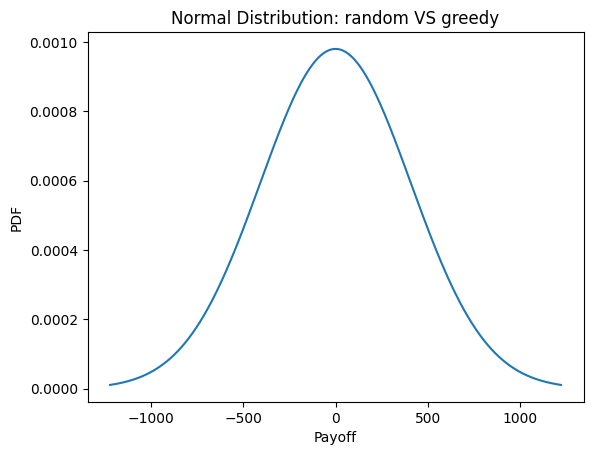

In [ ]:
game = Game(num_cards = n, num_hand = m, num_table = k, change_first = True)
game_stats = game.multiple_simulate(num_sim, strategies = ["random", "greedy"])

print(game_stats)
game_stats.normal_distribution()

## Greedy VS Greedy

  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 49% of times) = 48.56%
Player B win percentage (going first 51% of times) = 48.26%
Tie percentage = 3.18%

--- Payoff ---
Mean = -1.067
Standard deviation = 12.046
Variance = 145.109


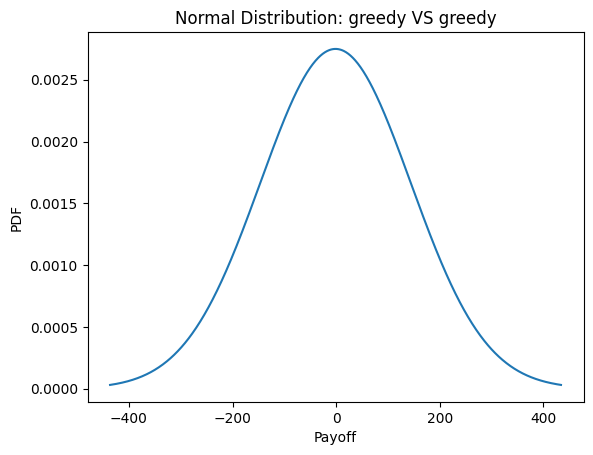

In [ ]:
game = Game(num_cards = n, num_hand = m, num_table = k, change_first = True)
game_stats = game.multiple_simulate(num_sim, strategies = ["greedy", "greedy"])

print(game_stats)
game_stats.normal_distribution()

## Random VS Minimax


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 50% of times) = 0.98%
Player B win percentage (going first 50% of times) = 98.56%
Tie percentage = 0.46%

--- Payoff ---
Mean = -1.709
Standard deviation = 21.37
Variance = 456.673


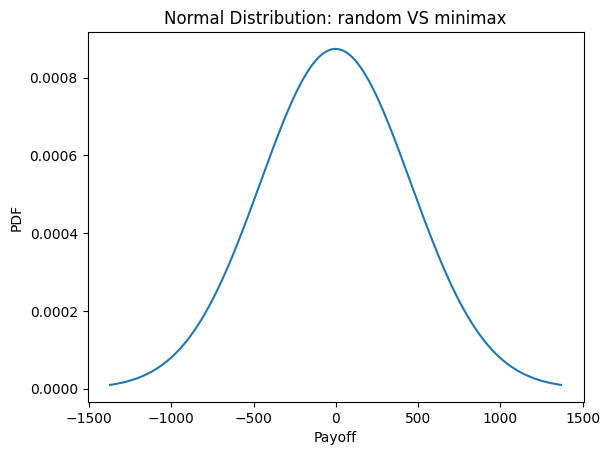


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 51% of times) = 0.62%
Player B win percentage (going first 49% of times) = 99.18%
Tie percentage = 0.2%

--- Payoff ---
Mean = -2.502
Standard deviation = 22.176
Variance = 491.772


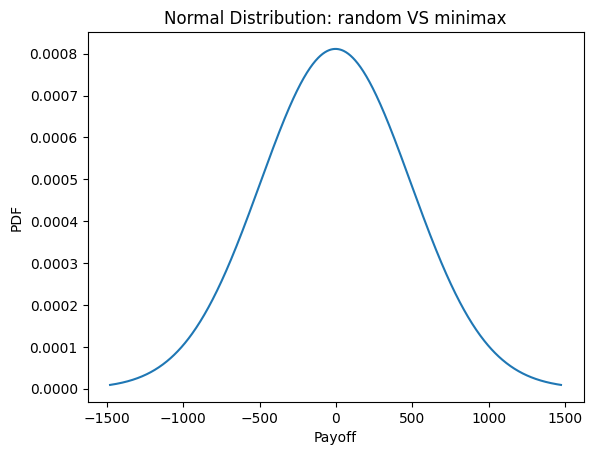


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 50% of times) = 0.48%
Player B win percentage (going first 50% of times) = 99.16%
Tie percentage = 0.36%

--- Payoff ---
Mean = -2.376
Standard deviation = 22.065
Variance = 486.876


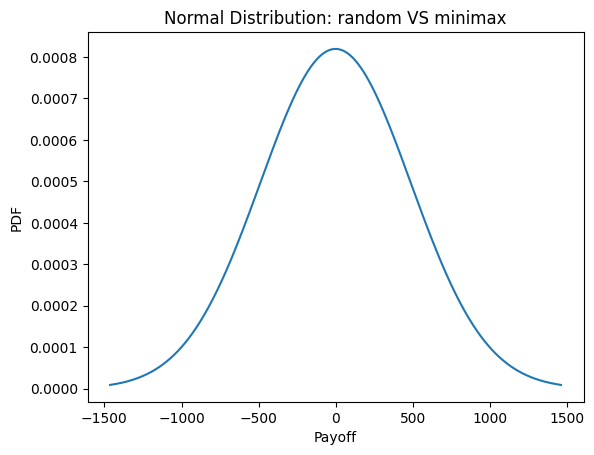

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = True, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["random", "minimax"])

  print(game_stats)
  game_stats.normal_distribution()

## Greedy VS Minimax


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 49% of times) = 23.86%
Player B win percentage (going first 51% of times) = 73.72%
Tie percentage = 2.42%

--- Payoff ---
Mean = -1.896
Standard deviation = 13.384
Variance = 179.126


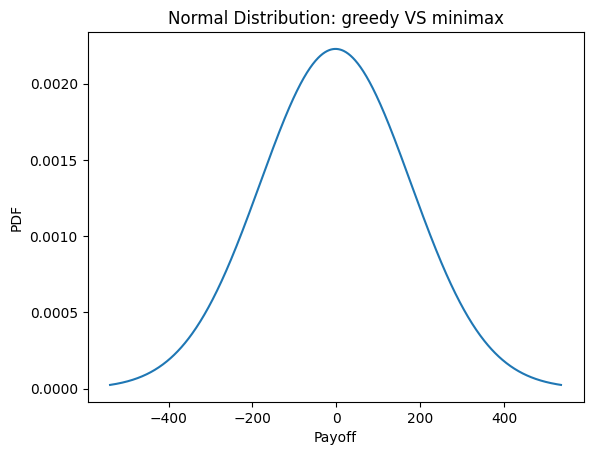


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 51% of times) = 15.24%
Player B win percentage (going first 49% of times) = 82.96%
Tie percentage = 1.8%

--- Payoff ---
Mean = -2.042
Standard deviation = 15.118
Variance = 228.542


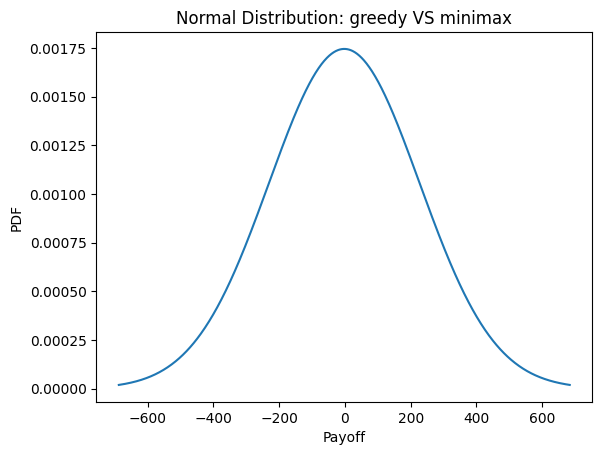


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 50% of times) = 11.66%
Player B win percentage (going first 50% of times) = 86.74%
Tie percentage = 1.6%

--- Payoff ---
Mean = -2.17
Standard deviation = 14.504
Variance = 210.354


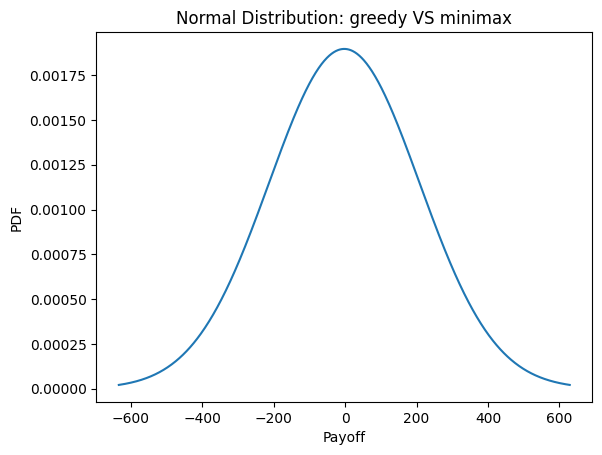

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = True, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["greedy", "minimax"])

  print(game_stats)
  game_stats.normal_distribution()

## Minimax VS Minimax


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 50% of times) = 47.8%
Player B win percentage (going first 50% of times) = 48.86%
Tie percentage = 3.34%

--- Payoff ---
Mean = -3.748
Standard deviation = 10.871
Variance = 118.182


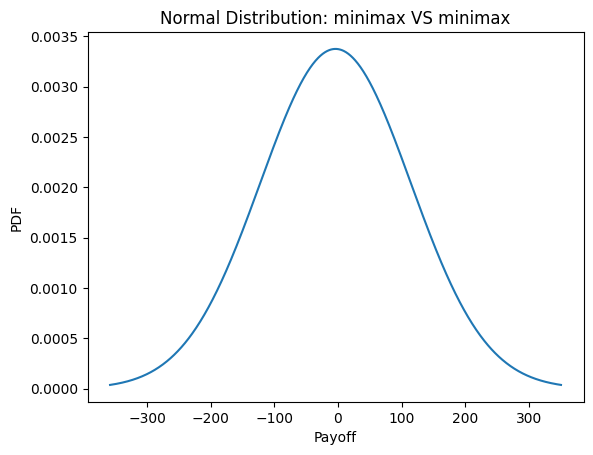


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 49% of times) = 47.9%
Player B win percentage (going first 51% of times) = 48.26%
Tie percentage = 3.84%

--- Payoff ---
Mean = -3.058
Standard deviation = 9.614
Variance = 92.433


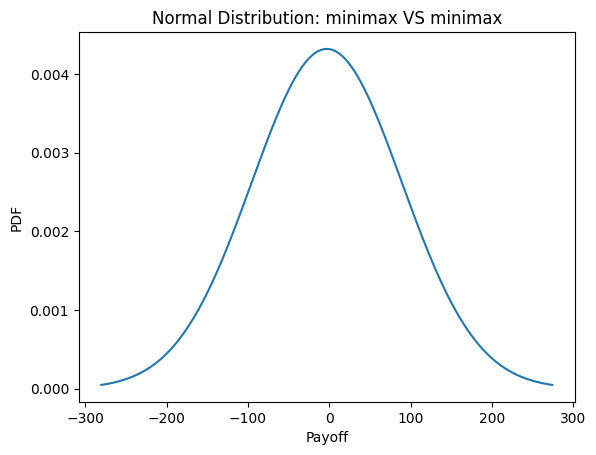


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 50% of times) = 47.44%
Player B win percentage (going first 50% of times) = 48.74%
Tie percentage = 3.82%

--- Payoff ---
Mean = -3.097
Standard deviation = 8.931
Variance = 79.762


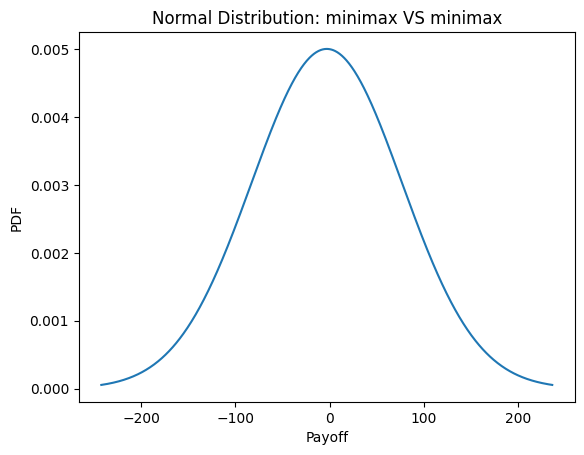

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = True, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["minimax", "minimax"])

  print(game_stats)
  game_stats.normal_distribution()

# Simulate multiple games (fixed first player)

Here, we simulate $n = 5000$ times for each type of simulation, with fixed first player (it is always A).

The aim of this section is to find out if there is any advantage in going first or second for each disposition of strategies.

For each of the simulations, other than what we showed before, we will also print the mean payoff over turns, so as to check how it evolves over turns and to quantify how much advantage is gained through going first (if it is positive) or second (if it is negative).

In [10]:
num_sim = 5000
n = 24
m = 11
k = 2
max_depth = 4

## Random VS Random


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS random ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 44.42%
Player B win percentage (going first 0% of times) = 52.02%
Tie percentage = 3.56%

--- Payoff ---
Mean = -1.006
Standard deviation = 10.235
Variance = 104.753


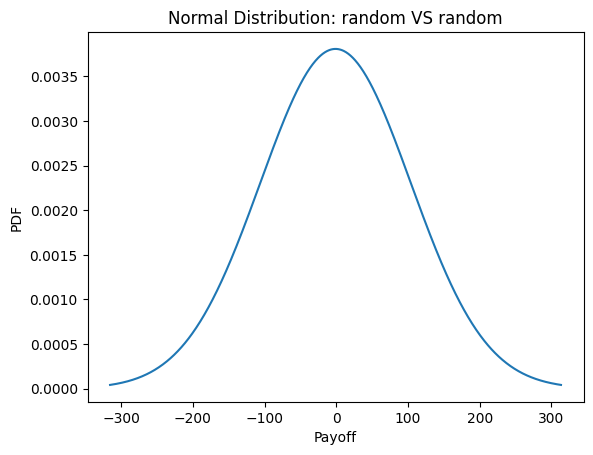

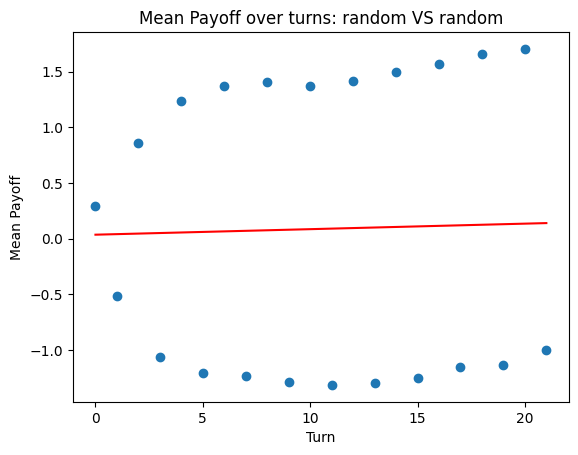

In [11]:
game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False)
game_stats = game.multiple_simulate(num_sim, strategies = ["random", "random"])

print(game_stats)
game_stats.normal_distribution()
game_stats.payoff_over_turns()

## Random VS Greedy

Here we check if the greedy strategy is implemented correctly and if it makes sense to use, since a random strategy should always lose against a "thinking" strategy.

  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 0.94%
Player B win percentage (going first 0% of times) = 98.84%
Tie percentage = 0.22%

--- Payoff ---
Mean = -20.688
Standard deviation = 7.423
Variance = 55.094


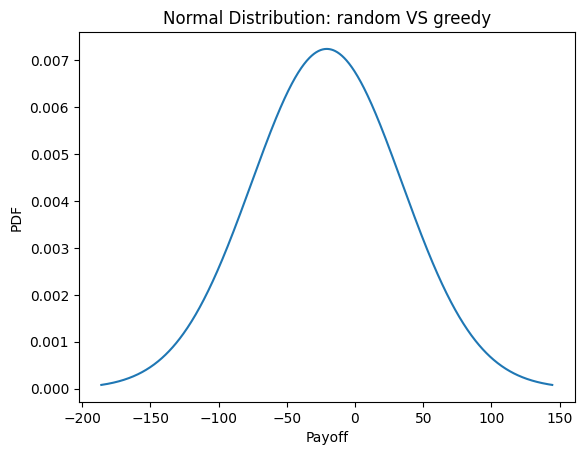

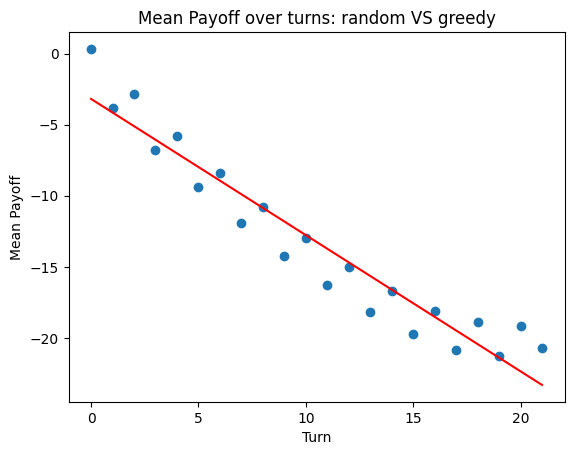

In [ ]:
game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False)
game_stats = game.multiple_simulate(num_sim, strategies = ["random", "greedy"])

print(game_stats)
game_stats.normal_distribution()
game_stats.payoff_over_turns()

## Greedy VS Random

  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS random ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 96.08%
Player B win percentage (going first 0% of times) = 3.1%
Tie percentage = 0.82%

--- Payoff ---
Mean = 16.45
Standard deviation = 8.21
Variance = 67.408


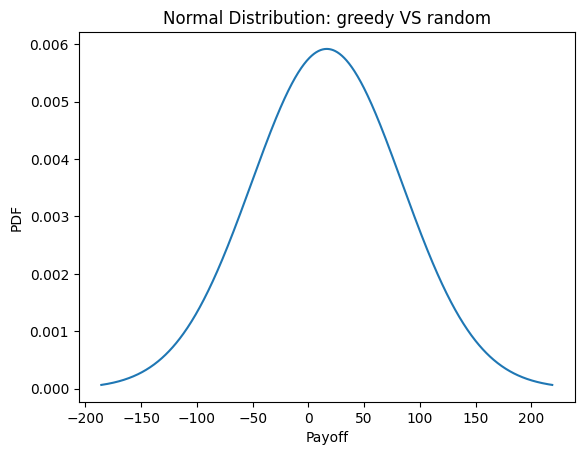

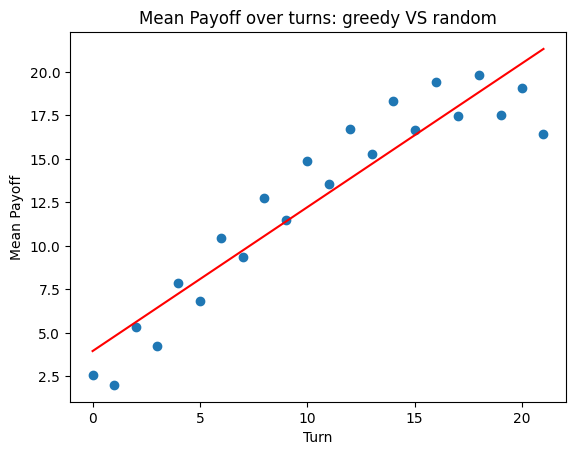

In [ ]:
game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False)
game_stats = game.multiple_simulate(num_sim, strategies = ["greedy", "random"])

print(game_stats)
game_stats.normal_distribution()
game_stats.payoff_over_turns()

## Greedy VS Greedy

  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 40.36%
Player B win percentage (going first 0% of times) = 56.46%
Tie percentage = 3.18%

--- Payoff ---
Mean = -2.434
Standard deviation = 12.021
Variance = 144.494


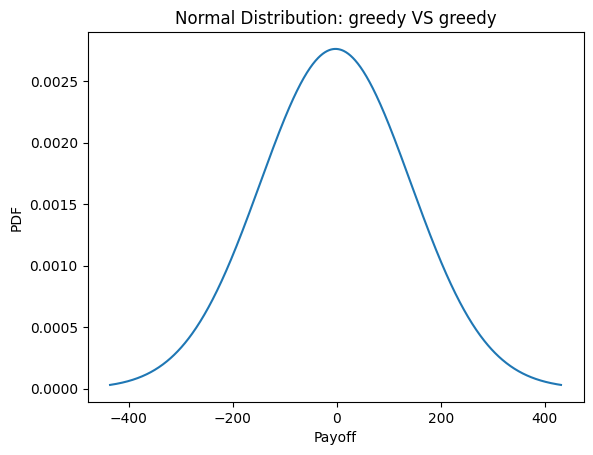

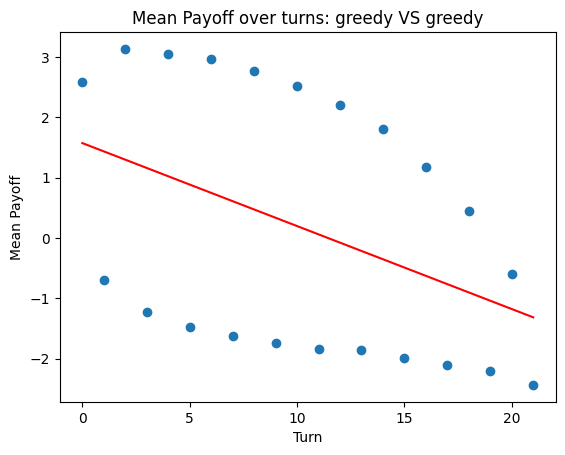

In [ ]:
game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False)
game_stats = game.multiple_simulate(num_sim, strategies = ["greedy", "greedy"])

print(game_stats)
game_stats.normal_distribution()
game_stats.payoff_over_turns()

## Random VS Minimax


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 0.36%
Player B win percentage (going first 0% of times) = 99.54%
Tie percentage = 0.1%

--- Payoff ---
Mean = -22.508
Standard deviation = 6.931
Variance = 48.037


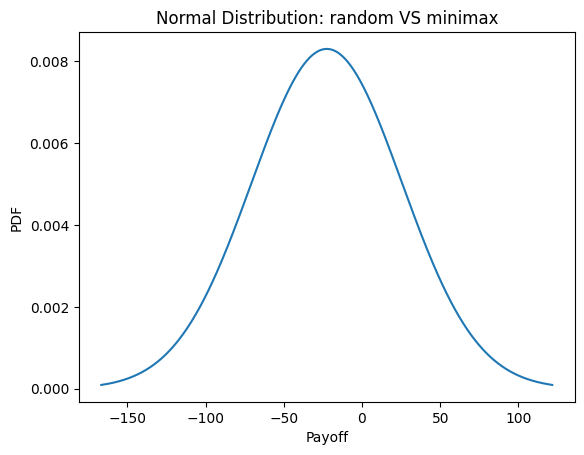

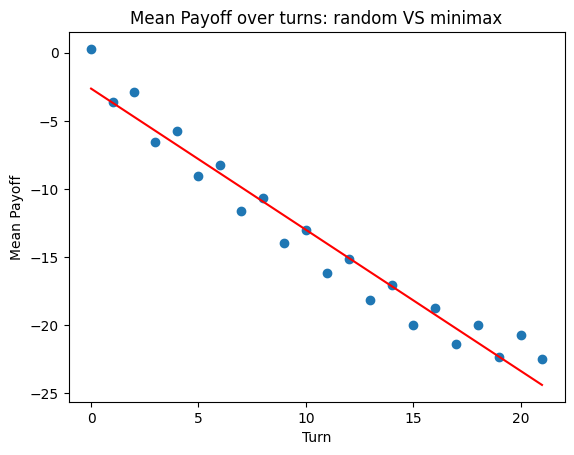


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 0.32%
Player B win percentage (going first 0% of times) = 99.62%
Tie percentage = 0.06%

--- Payoff ---
Mean = -23.474
Standard deviation = 6.355
Variance = 40.389


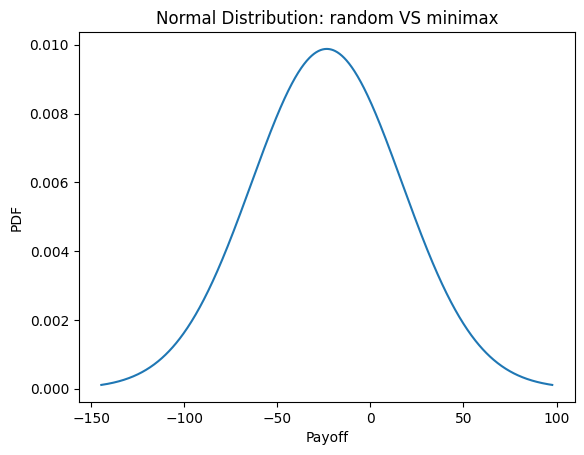

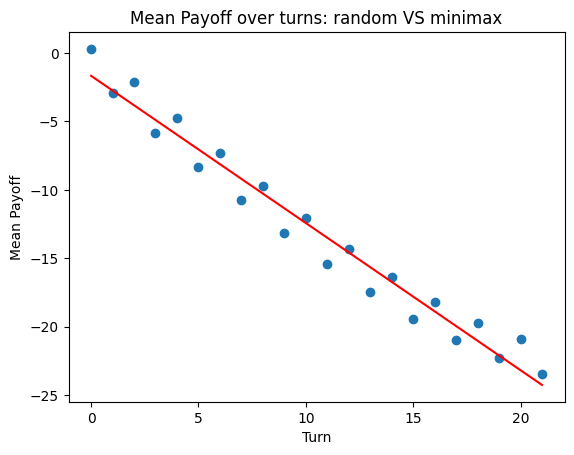


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of random VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 0.06%
Player B win percentage (going first 0% of times) = 99.88%
Tie percentage = 0.06%

--- Payoff ---
Mean = -23.649
Standard deviation = 6.233
Variance = 38.849


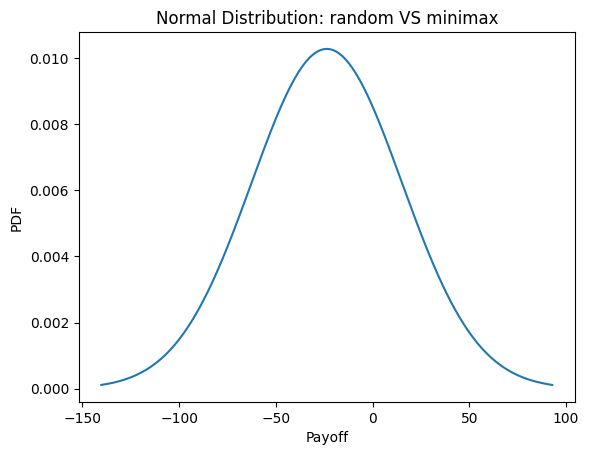

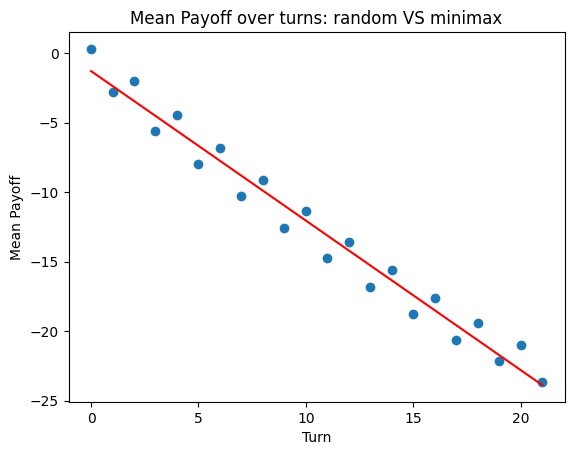

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["random", "minimax"])

  print(game_stats)
  game_stats.normal_distribution()
  game_stats.payoff_over_turns()

## Minimax VS Random


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS random ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 97.6%
Player B win percentage (going first 0% of times) = 1.84%
Tie percentage = 0.56%

--- Payoff ---
Mean = 17.828
Standard deviation = 7.923
Variance = 62.772


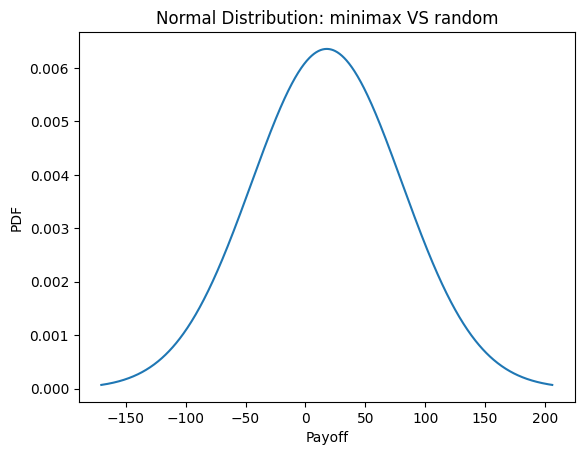

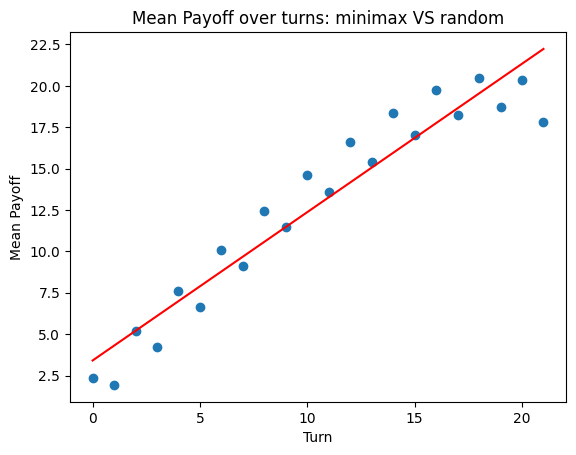


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS random ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 98.44%
Player B win percentage (going first 0% of times) = 1.22%
Tie percentage = 0.34%

--- Payoff ---
Mean = 18.635
Standard deviation = 7.523
Variance = 56.589


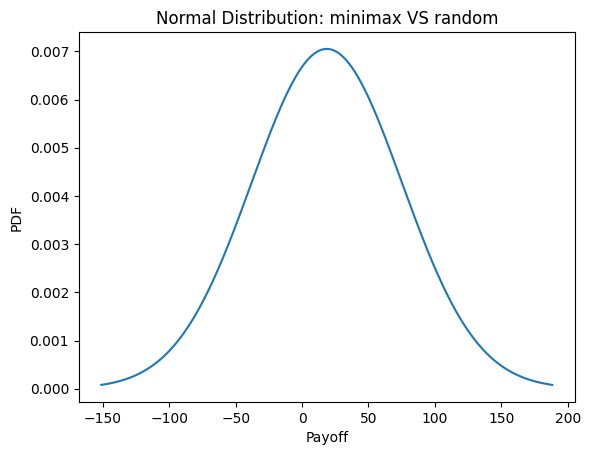

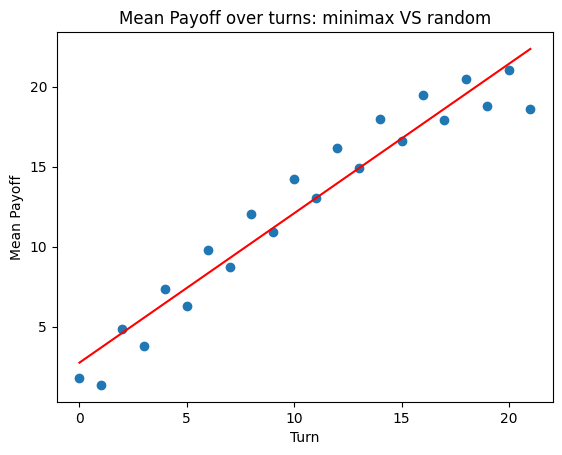


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS random ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 98.68%
Player B win percentage (going first 0% of times) = 0.94%
Tie percentage = 0.38%

--- Payoff ---
Mean = 18.462
Standard deviation = 7.191
Variance = 51.708


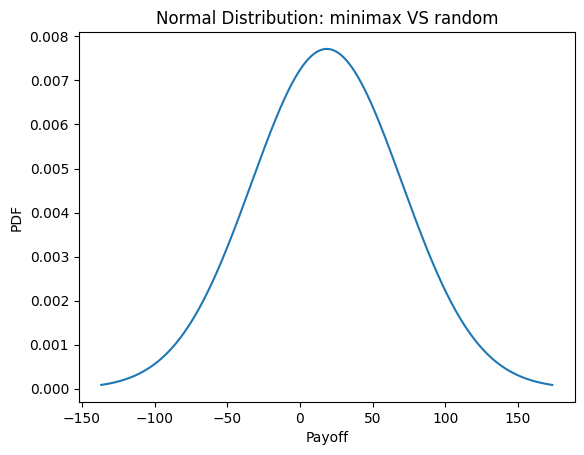

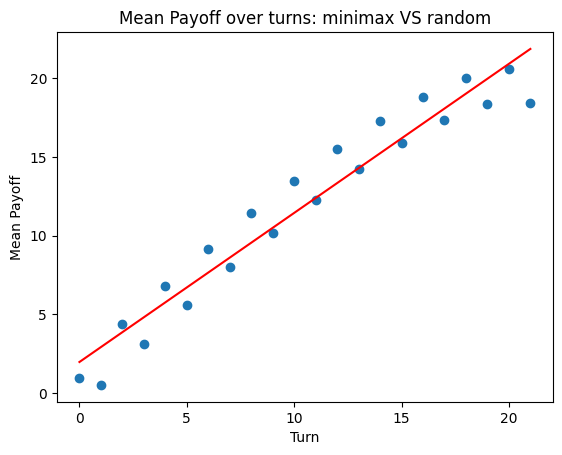

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["minimax", "random"])

  print(game_stats)
  game_stats.normal_distribution()
  game_stats.payoff_over_turns()

## Greedy VS Minimax


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 14.8%
Player B win percentage (going first 0% of times) = 83.46%
Tie percentage = 1.74%

--- Payoff ---
Mean = -11.02
Standard deviation = 10.624
Variance = 112.863


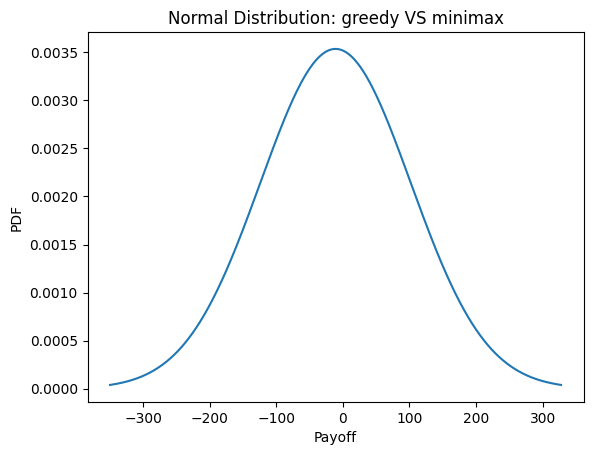

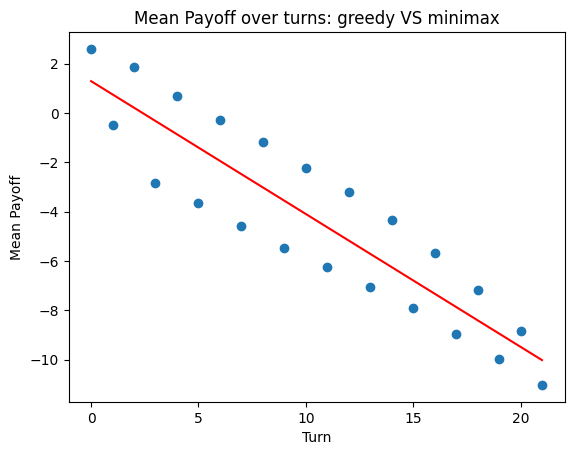


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 7.88%
Player B win percentage (going first 0% of times) = 91.16%
Tie percentage = 0.96%

--- Payoff ---
Mean = -14.303
Standard deviation = 9.661
Variance = 93.336


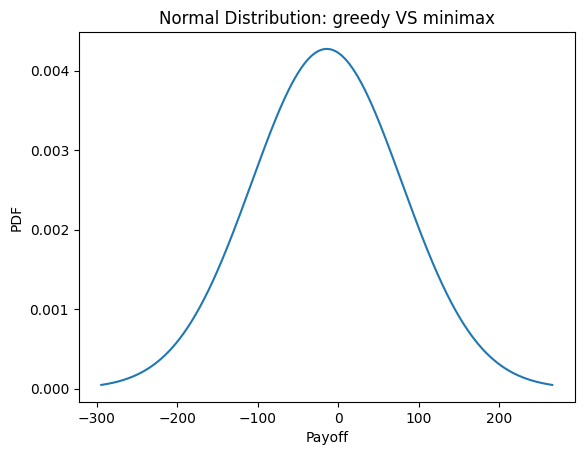

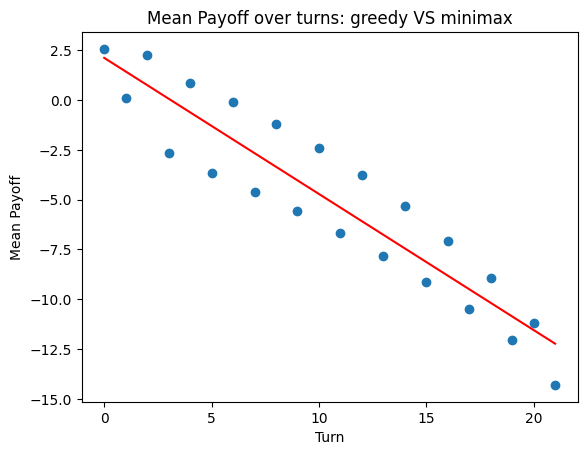


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of greedy VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 5.6%
Player B win percentage (going first 0% of times) = 93.22%
Tie percentage = 1.18%

--- Payoff ---
Mean = -14.548
Standard deviation = 8.858
Variance = 78.464


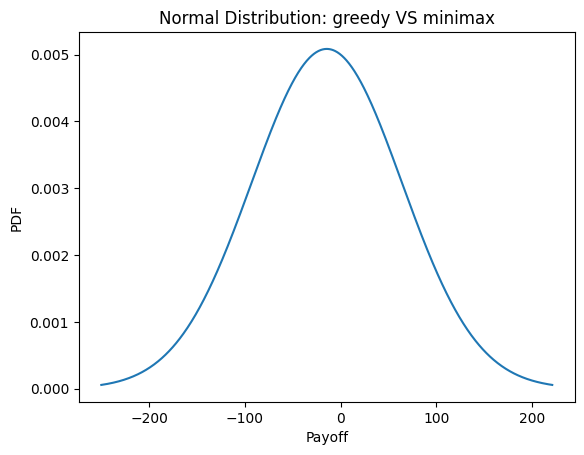

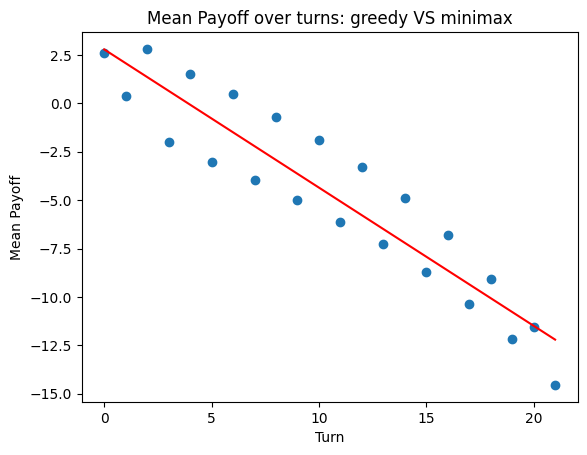

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["greedy", "minimax"])

  print(game_stats)
  game_stats.normal_distribution()
  game_stats.payoff_over_turns()

## Minimax VS Greedy


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 61.48%
Player B win percentage (going first 0% of times) = 35.74%
Tie percentage = 2.78%

--- Payoff ---
Mean = 3.843
Standard deviation = 11.642
Variance = 135.532


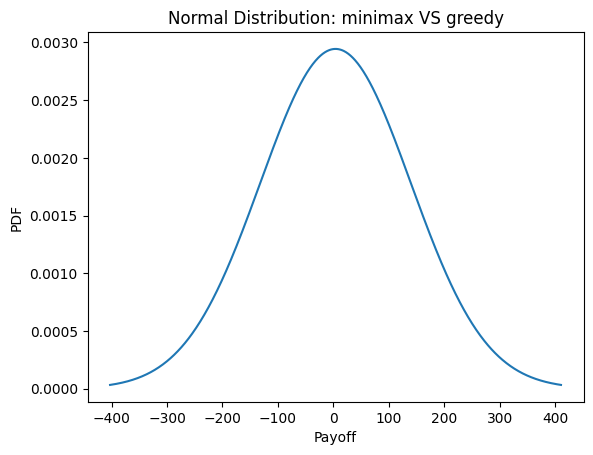

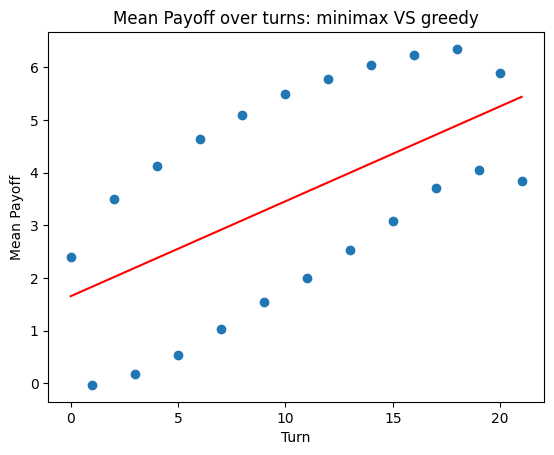


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 73.32%
Player B win percentage (going first 0% of times) = 23.96%
Tie percentage = 2.72%

--- Payoff ---
Mean = 7.35
Standard deviation = 10.809
Variance = 116.845


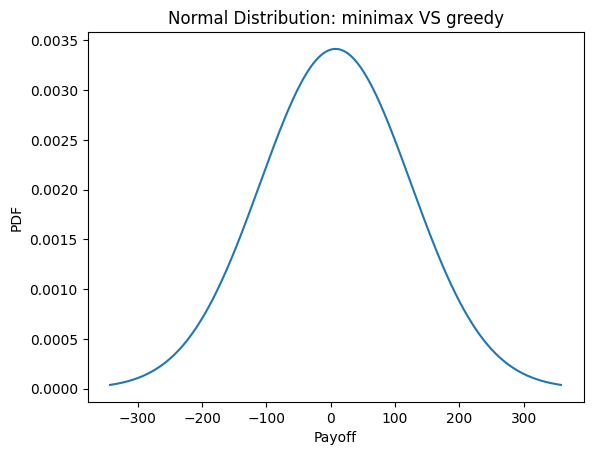

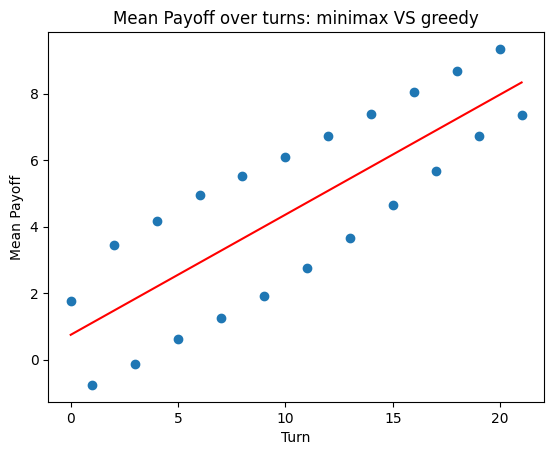


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS greedy ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 77.02%
Player B win percentage (going first 0% of times) = 20.32%
Tie percentage = 2.66%

--- Payoff ---
Mean = 7.702
Standard deviation = 9.73
Variance = 94.68


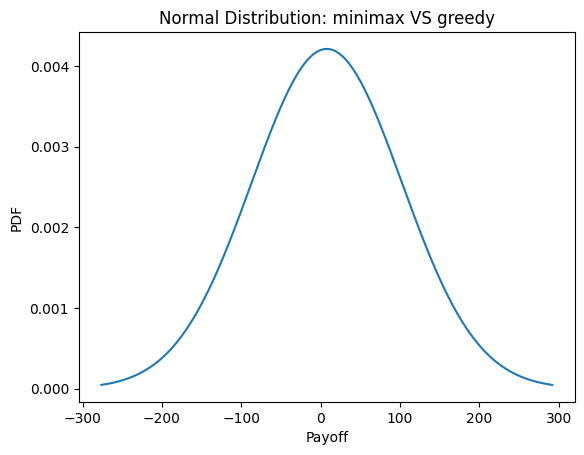

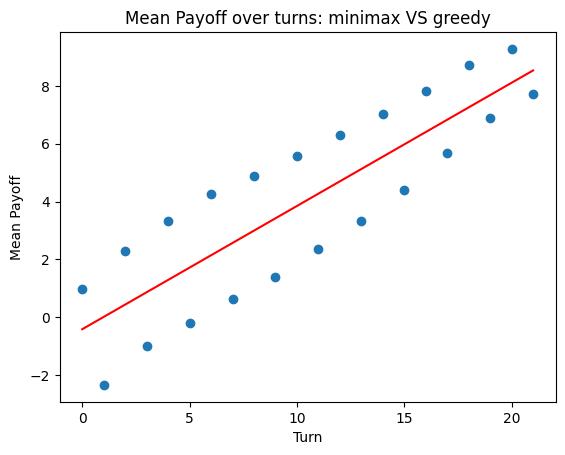

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["minimax", "greedy"])

  print(game_stats)
  game_stats.normal_distribution()
  game_stats.payoff_over_turns()

## Minimax VS Minimax


 -------------------- depth = 2 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 29.14%
Player B win percentage (going first 0% of times) = 67.98%
Tie percentage = 2.88%

--- Payoff ---
Mean = -5.264
Standard deviation = 10.95
Variance = 119.896


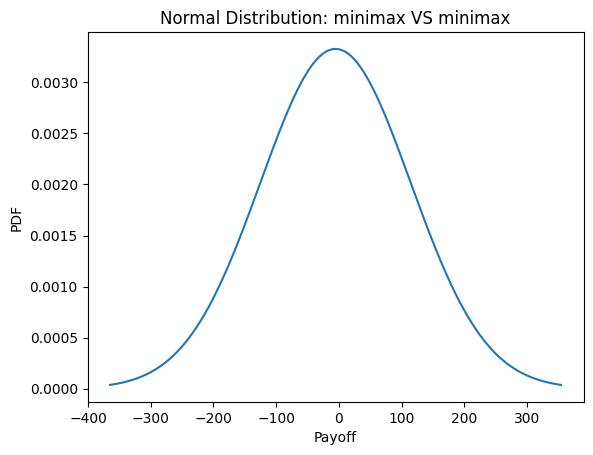

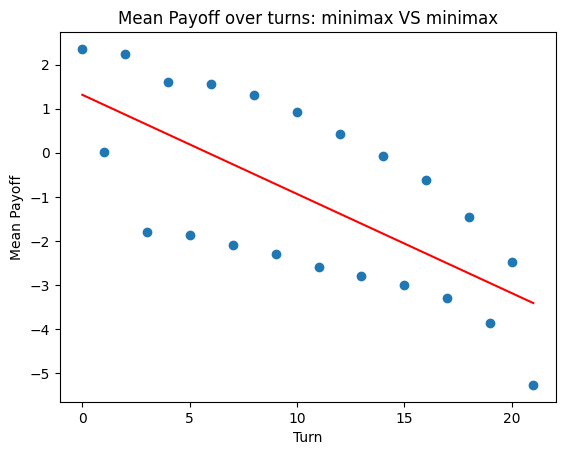


 -------------------- depth = 3 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 29.82%
Player B win percentage (going first 0% of times) = 66.72%
Tie percentage = 3.46%

--- Payoff ---
Mean = -4.809
Standard deviation = 9.635
Variance = 92.825


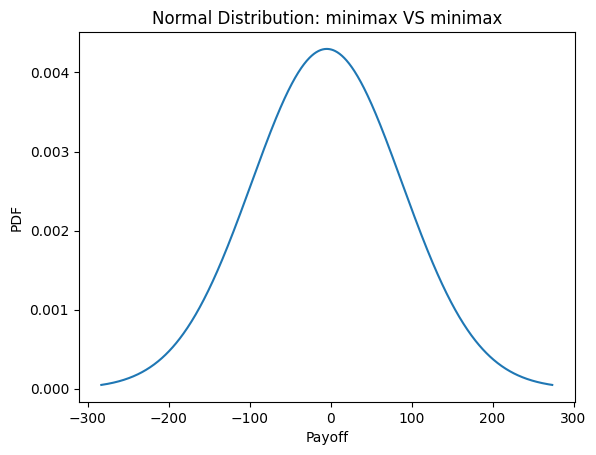

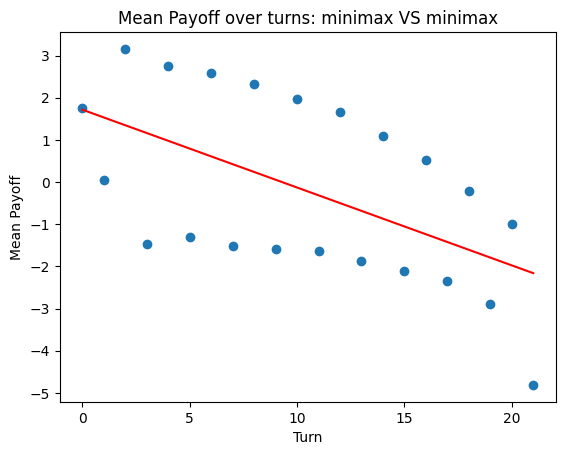


 -------------------- depth = 4 --------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

--- Statistics of minimax VS minimax ---
Number of simulations = 5000
Player A win percentage (going first 100% of times) = 26.12%
Player B win percentage (going first 0% of times) = 70.28%
Tie percentage = 3.6%

--- Payoff ---
Mean = -5.103
Standard deviation = 8.871
Variance = 78.696


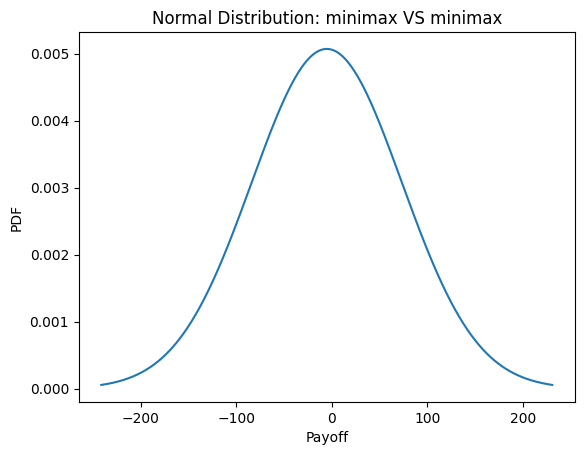

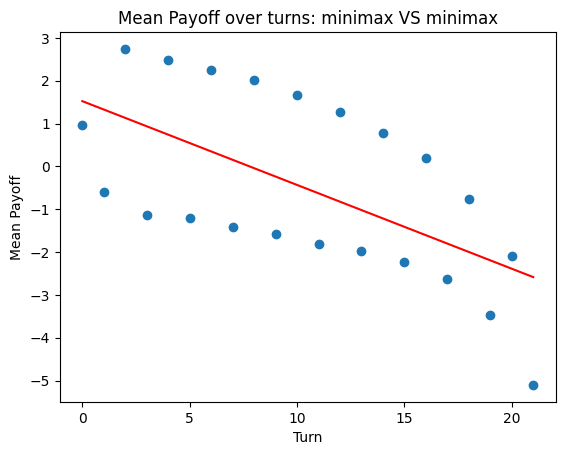

In [ ]:
for i in range(2, max_depth + 1):
  print("\n", "-"*20, f"depth = {i}", "-"*20)
  game = Game(num_cards = n, num_hand = m, num_table = k, change_first = False, depth = i)
  game_stats = game.multiple_simulate(num_sim, strategies = ["minimax", "minimax"])

  print(game_stats)
  game_stats.normal_distribution()
  game_stats.payoff_over_turns()